In [1]:
# Package imports

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load datasets

train_df = pd.read_csv('./Datasets/loan_status_train.csv')
test_df = pd.read_csv('./Datasets/loan_status_test.csv')

train_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


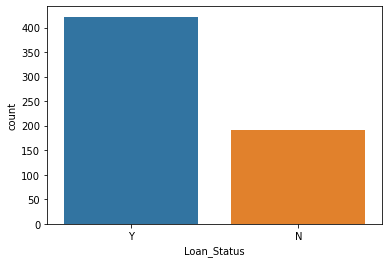

In [6]:
loanStatusPlot = sns.countplot(train_df['Loan_Status'])
loanStatusPlot.set_title='Loans Approved Count'

In [4]:
g = sns.FacetGrid(train_df, col="Loan_Status", height=4, aspect=.5)
g.map(sns.countplot, "Gender")

NameError: name 'sns' is not defined

In [4]:
# Feature engineering

def feature_engineer(df):    
    # Reduce features under consideration
    df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

    # Remove unnecessary column
    df.drop(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome'], axis=1, inplace=True)

    # Fill missing values
    df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
    df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
    df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
    df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
    df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

    # Replace values with boolean
    df.replace({
        'Yes': 1,
        'No': 0,
        'Male': 1,
        'Female': 0,
        'Graduate': 1,
        'Not Graduate': 0,
        'Urban': 2,
        'Semiurban': 1,
        'Rural': 0,
        'Y': 1,
        'N': 0,
        '0': 0,
        '1': 1,
        '2': 2,
        '3+': 3,
    }, inplace=True)

In [5]:
feature_engineer(train_df)

# Remove rows with Null values
train_df = train_df[train_df['Credit_History'].notna()]
train_df = train_df[train_df['Self_Employed'].notna()]

train_df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0,1,0.0,146.412162,360.0,1.0,2,1,5849.0
1,1,1,1,1,0.0,128.000000,360.0,1.0,0,0,6091.0
2,1,1,0,1,1.0,66.000000,360.0,1.0,2,1,3000.0
3,1,1,0,0,0.0,120.000000,360.0,1.0,2,1,4941.0
4,1,0,0,1,0.0,141.000000,360.0,1.0,2,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0.0,71.000000,360.0,1.0,0,1,2900.0
610,1,1,3,1,0.0,40.000000,180.0,1.0,0,1,4106.0
611,1,1,1,1,0.0,253.000000,360.0,1.0,2,1,8312.0
612,1,1,2,1,0.0,187.000000,360.0,1.0,2,1,7583.0


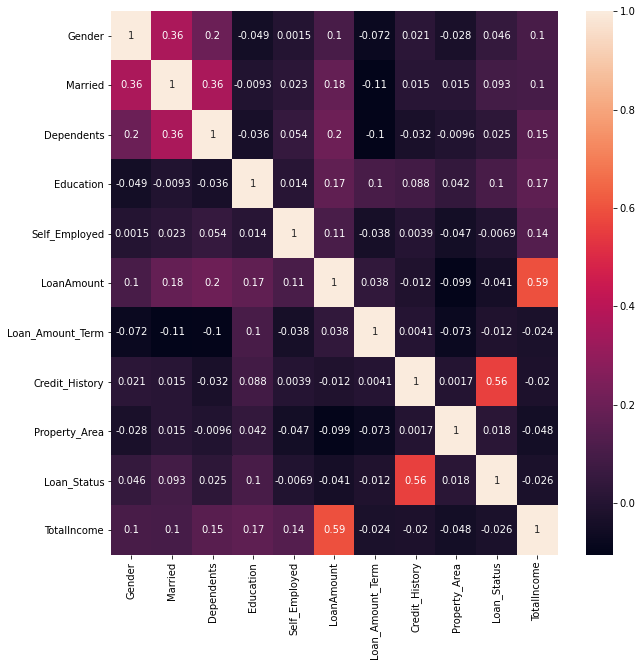

In [6]:
# Correlation between variables

corr_matrix = train_df.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [7]:
feature_engineer(test_df)
test_df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,1,1,0,1,0.0,110.0,360.0,1.0,2,5720
1,1,1,1,1,0.0,126.0,360.0,1.0,2,4576
2,1,1,2,1,0.0,208.0,360.0,1.0,2,6800
3,1,1,2,1,0.0,100.0,360.0,NaN,2,4886
4,1,0,0,0,0.0,78.0,360.0,1.0,2,3276
...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,0,1.0,113.0,360.0,1.0,2,5786
363,1,1,0,1,0.0,115.0,360.0,1.0,2,4867
364,1,0,0,1,0.0,126.0,360.0,NaN,1,5243
365,1,1,0,1,0.0,158.0,360.0,1.0,0,7393


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [9]:
def train_models(X_train, y_train, X_test, y_test, X, y):
    models = [LogisticRegression(random_state=42, max_iter=200), 
              SVC(kernel='linear', C=1), 
              RandomForestClassifier(n_estimators=20)]
    model_names = ['LogisticRegression', 'SupportVectorClassifier', 'RandomForest']
    accuracy = []
    cross_score = [] 
    for model in models:
        model.fit(X_train, y_train)
        accuracy.append(accuracy_score(y_test, model.predict(X_test)))
        cross_score.append(cross_val_score(model, X, y, cv=5).mean())
        
    result_df = pd.DataFrame(list(zip(accuracy, cross_score)),columns=['accuracy','cross_score'], index=model_names)
        
    return result_df

In [10]:
X = np.array(train_df.drop('Loan_Status', axis=1))
y = np.array(train_df['Loan_Status'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
corr_result = train_models(X_train, y_train, X_test, y_test, X, y)
corr_result

,accuracy,cross_score
LogisticRegression,0.814815,0.803063
SupportVectorClassifier,0.805556,0.771478
RandomForest,0.777778,0.773295
